# IMPORTATION DES PACKAGES

In [218]:
import pandas as pd
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

# Description et visualisation du jeu de données

In [162]:
# les fonctions definitives pour eviter de faire cellule par cellule
def description(file):
    data = pd.read_csv(file)
    print("le jeu de données contient ",data.shape[0]," lignes et ", data.shape[1]," colonnes\n")
    print("les 10 premières du jeu de données :\n")
    data.head()
    print("les différents types de données:\n")
    data.dtypes
    print("la description des données de type numériques:\n")
    data.describe()
    print("la distribution des observations en fonction de la variable cible:\n")
    round(data["Result"].value_counts(normalize=True),2)
    

def visualisation (data, Y, title):
    # print("la distribution des observations en fonction de la variable cible:\n")
    round(data["Result"].value_counts(normalize=True),2)
    sns.countplot(x=Y, data=data)
    plt.xlabel('Les 2 types de résultats')
    plt.ylabel('Nombre d\'occurrences')
    plt.title(title)
    plt.show()
    
    
def split(data,size,class_label):
    train_set, test_set = train_test_split(data, train_size=size, random_state=0, stratify=class_label)
    return train_set, test_set


def split_2(train_set, test_set):
    y_test = test_set["variety"]
    y_train = train_set["variety"]
    # encoder = preprocessing.LabelEncoder()
    # Y_encd = encoder.fit_transform(Y)
    x_train = train_set.iloc[:, [0, 1, 2, 3]]
    x_test = test_set.iloc[:, [0, 1, 2, 3]]
    return x_train, x_test, y_train, y_test


def preprocessing(data):
    data_clean = data.copy()
    for col in data_clean.select_dtypes(['int','float']).columns:
        print(col)
        Q1 = data_clean[col].quantile(0.25)
        Q3 = data_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        # print(IQR, Q1-1.5*IQR, Q3+1.5*IQR)
        data_clean = data_clean[~((data_clean[col]<(Q1-1.5*IQR))|(data_clean[col]>(Q3+1.5*IQR)))]
    return(data_clean)

def encodage():
    

IndentationError: expected an indented block (3369692179.py, line 52)

In [132]:
data = pd.read_csv("Medicaldataset.csv")
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [133]:
data.shape

(1319, 9)

In [134]:
data.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [135]:
data.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [136]:
# inutile
round(data["Result"].value_counts(normalize=True),2)
# round(data["Troponin"].value_counts(),2)

positive    0.61
negative    0.39
Name: Result, dtype: float64

<AxesSubplot:ylabel='None'>

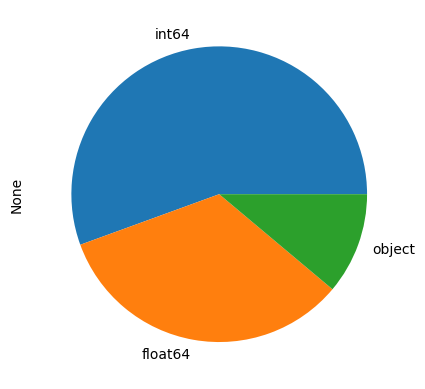

In [137]:
# test de visuel
data.dtypes.value_counts().plot.pie()

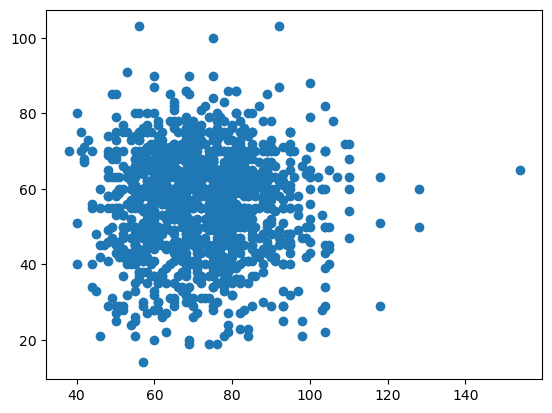

In [138]:
plt.scatter(data["Diastolic blood pressure"],data["Age"])

Text(0.5, 1.0, 'Scatter plot of systolic pressure by age')

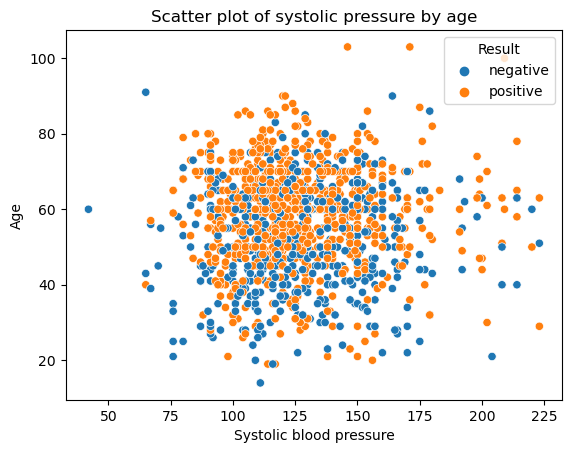

In [139]:
sns.scatterplot(data=data, x="Systolic blood pressure", y="Age", hue=data["Result"])
plt.title("Scatter plot of systolic pressure by age")

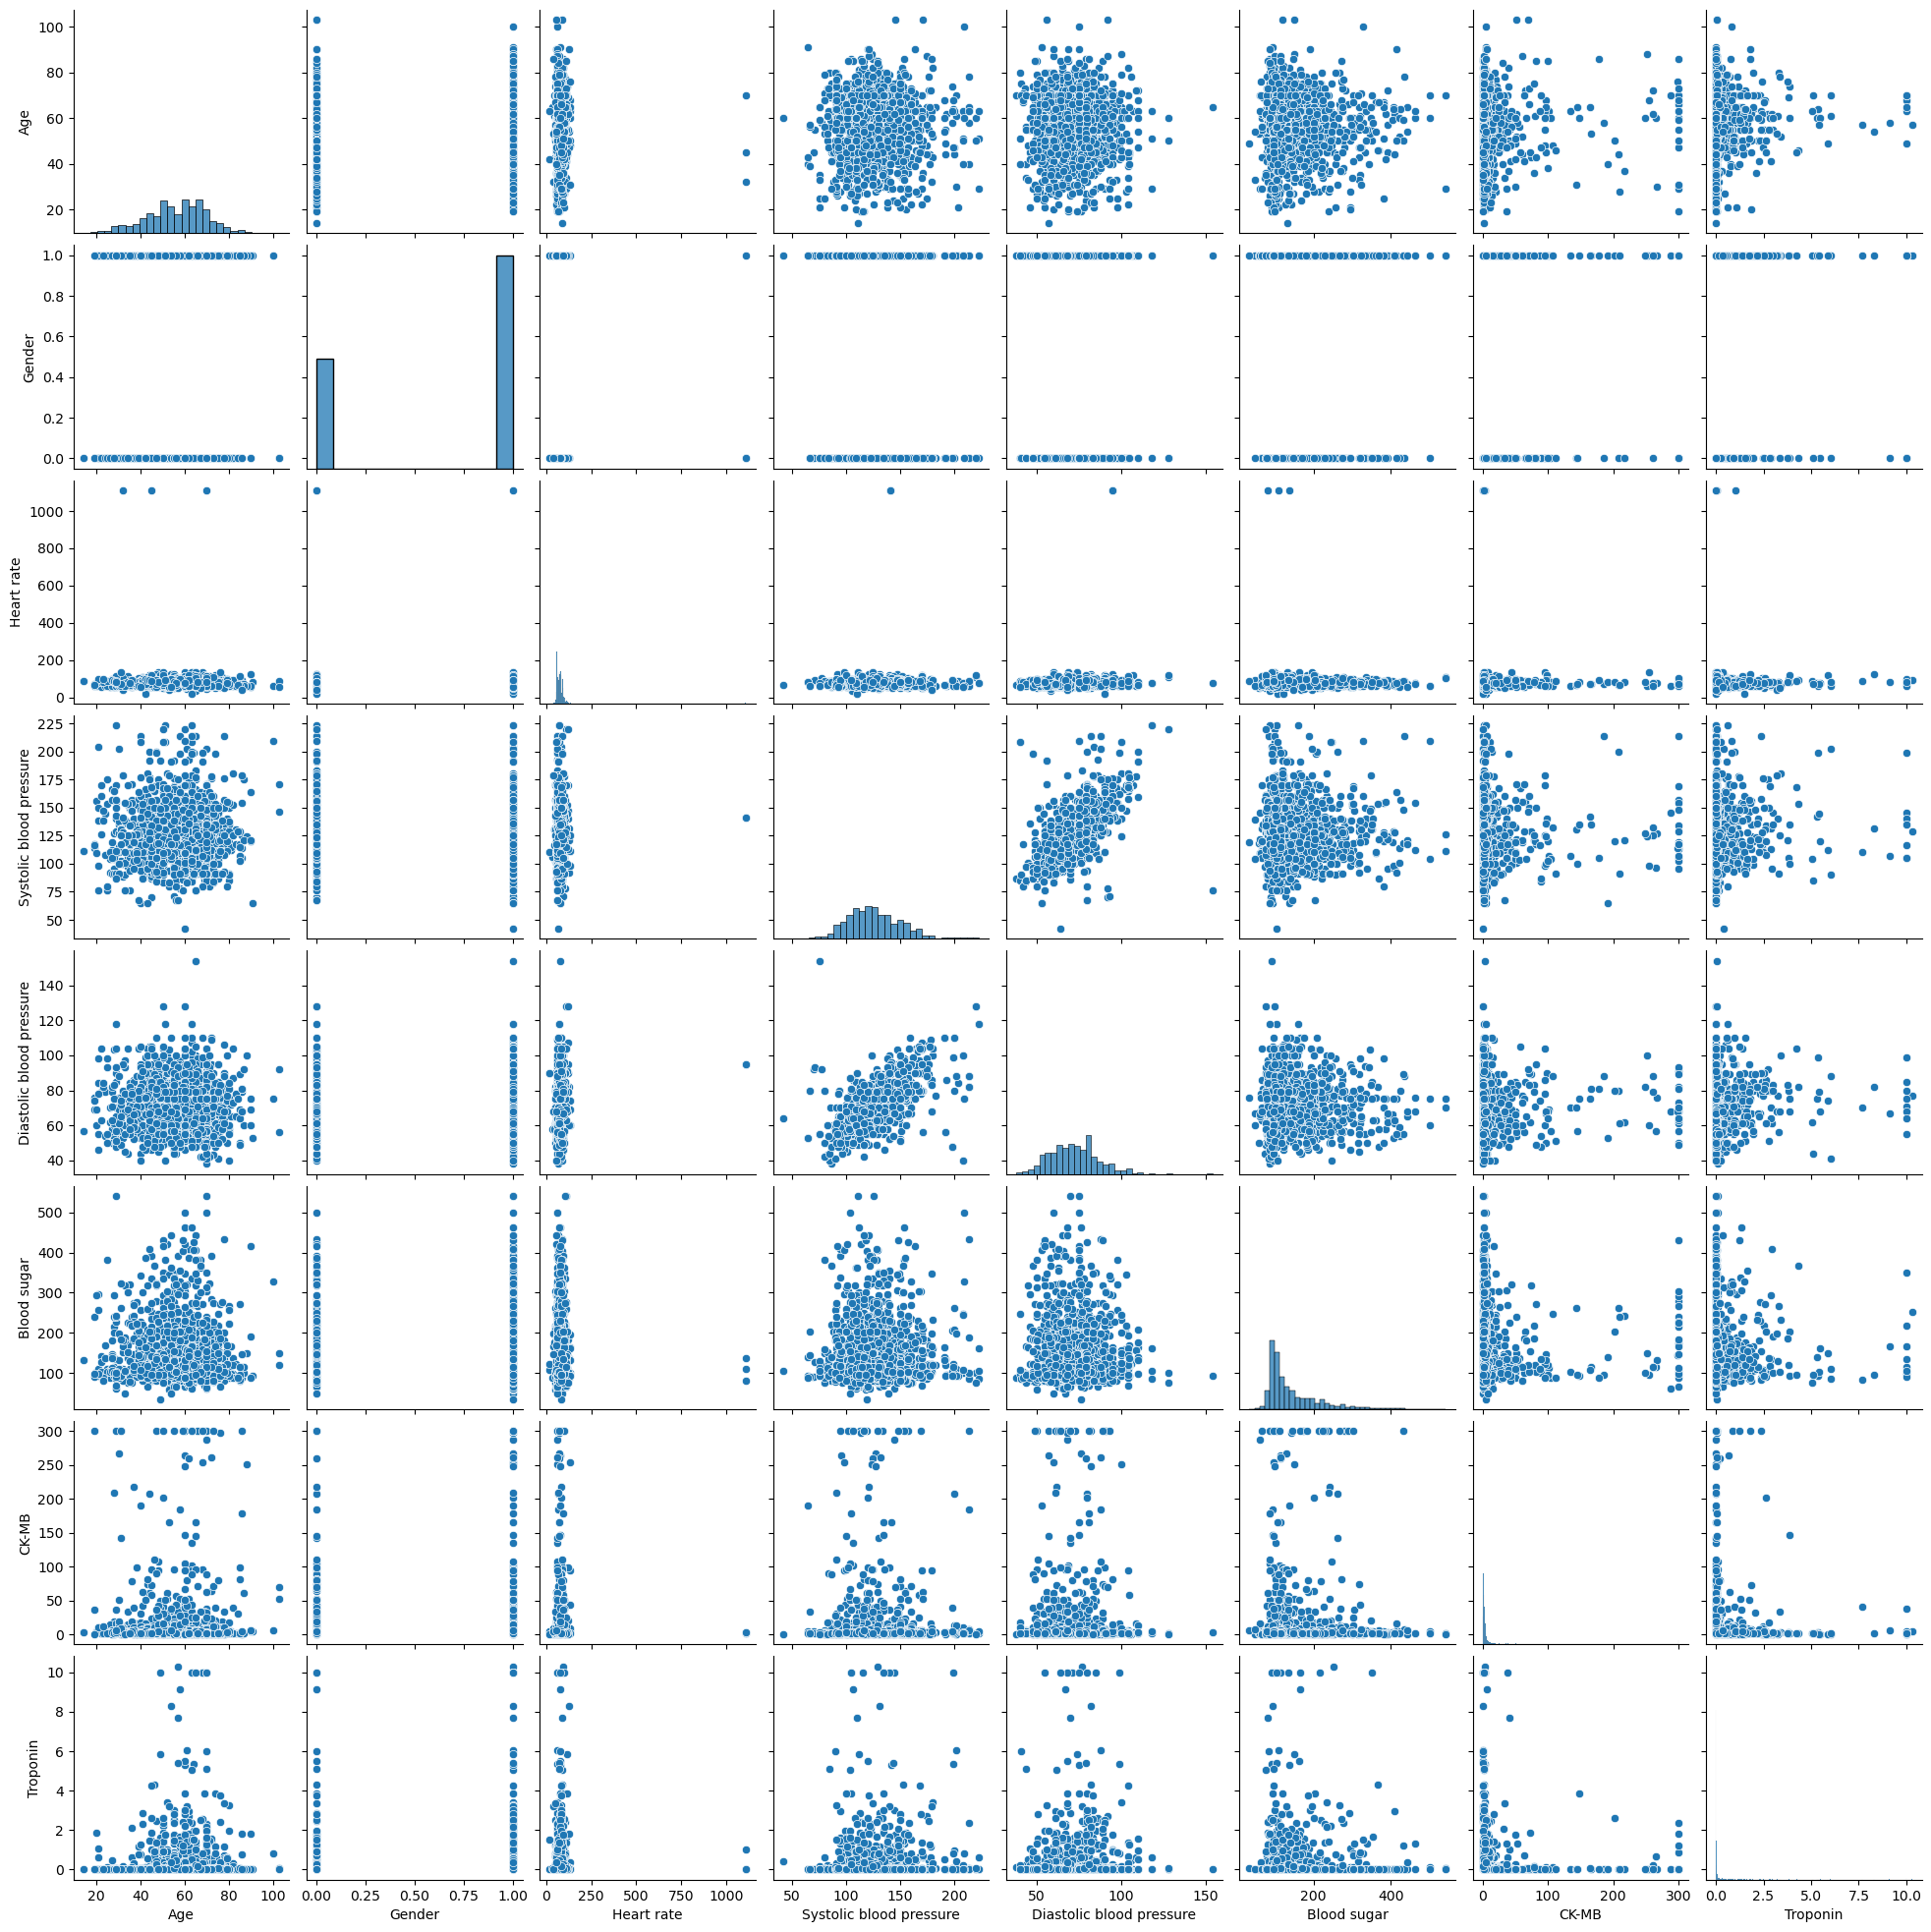

In [140]:
sns.pairplot(data)

<AxesSubplot:>

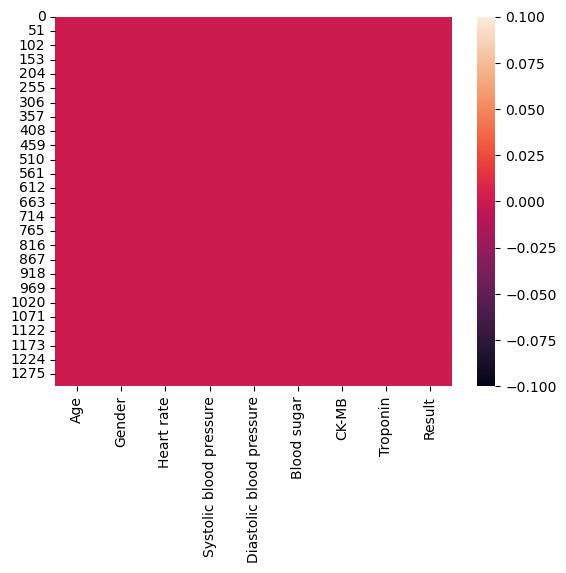

In [141]:
# inutile
sns.heatmap(data.isna())

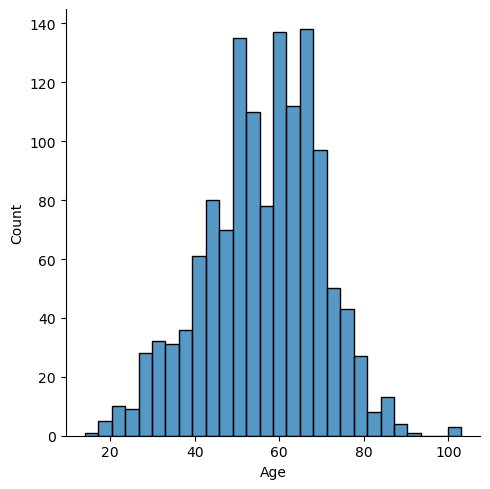

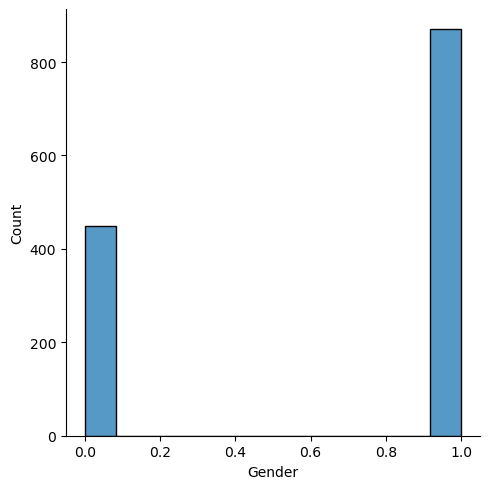

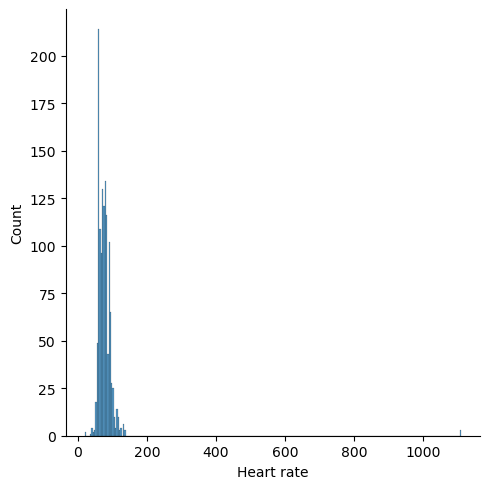

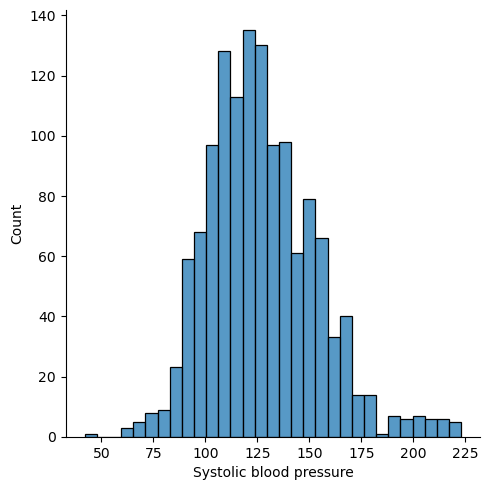

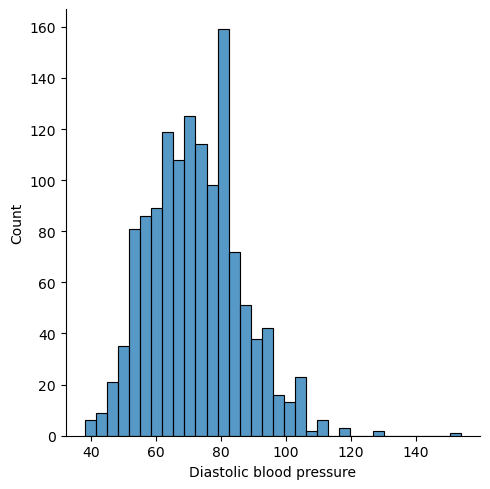

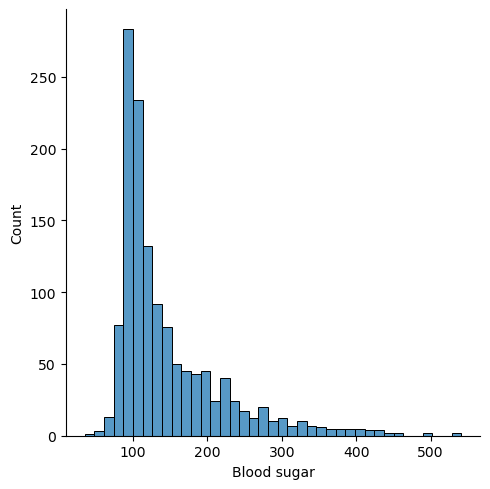

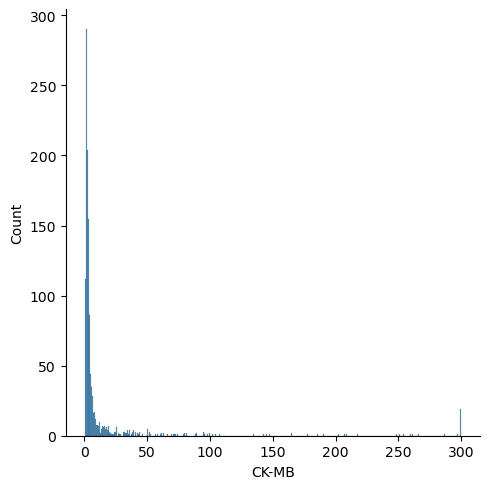

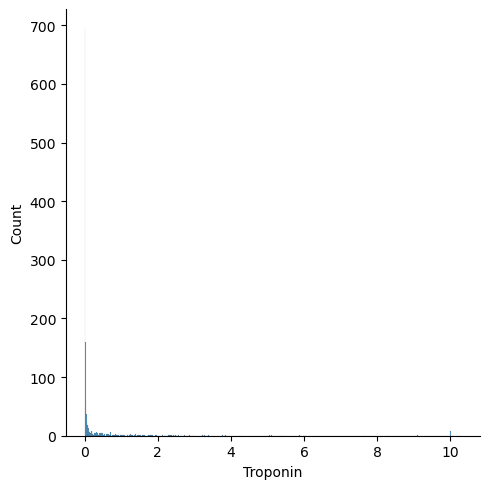

In [142]:
for col in data.select_dtypes(['int','float']):
    plt.figure
    sns.displot(data[col])

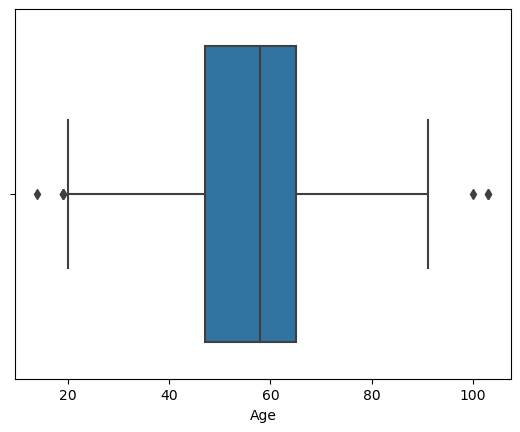

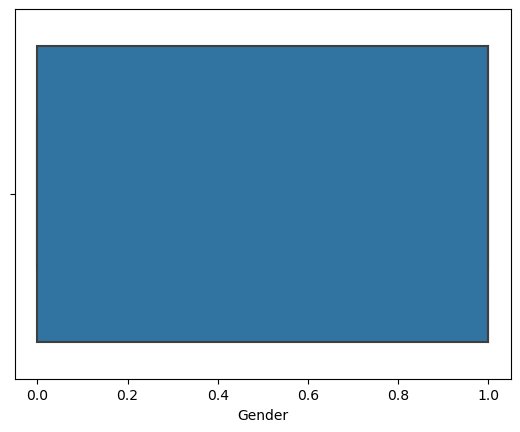

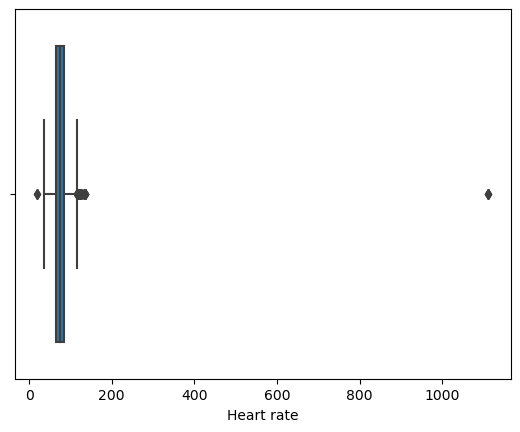

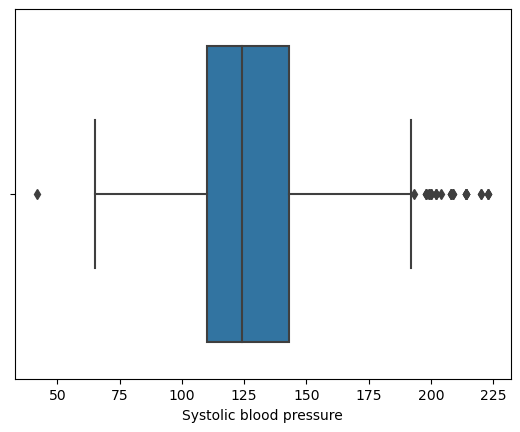

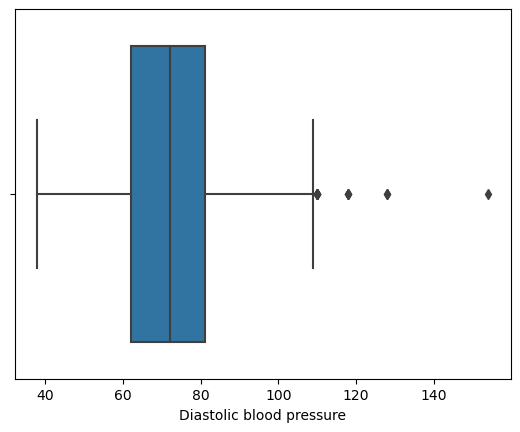

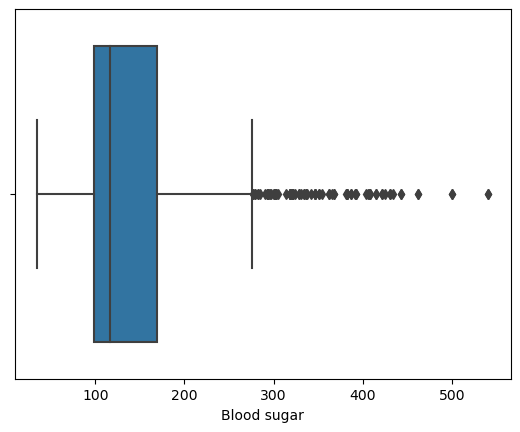

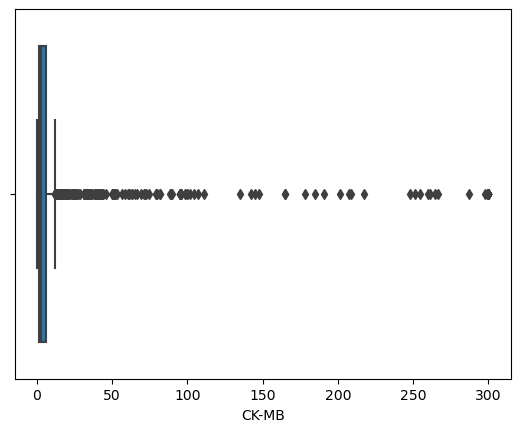

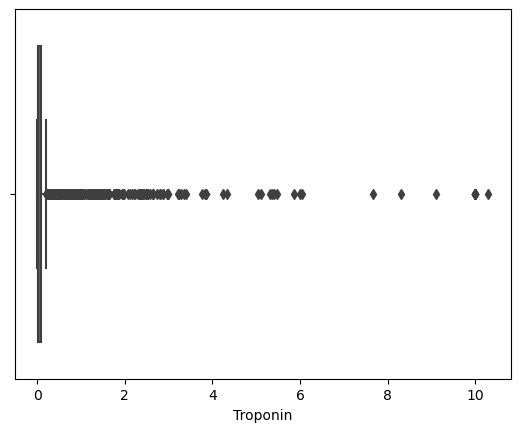

In [143]:
for col in data.select_dtypes(['int','float']):
    plt.figure
    sns.boxplot(data[col])
    plt.show()

# Preprocessing

In [144]:
# nettoyage des outliers
data_clean = data.copy()
for col in data_clean.select_dtypes(['int','float']).columns:
    print(col)
    Q1 = data_clean[col].quantile(0.25)
    Q3 = data_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    # print(IQR, Q1-1.5*IQR, Q3+1.5*IQR)
    data_clean = data_clean[~((data_clean[col]<(Q1-1.5*IQR))|(data_clean[col]>(Q3+1.5*IQR)))]

Age
Gender
Heart rate
Systolic blood pressure
Diastolic blood pressure
Blood sugar
CK-MB
Troponin


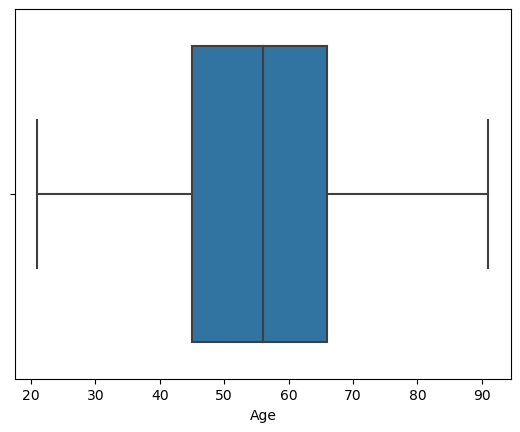

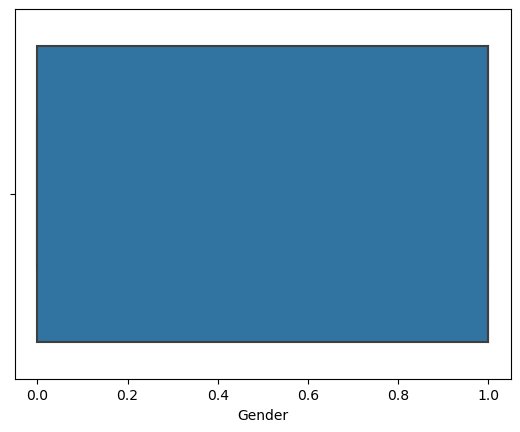

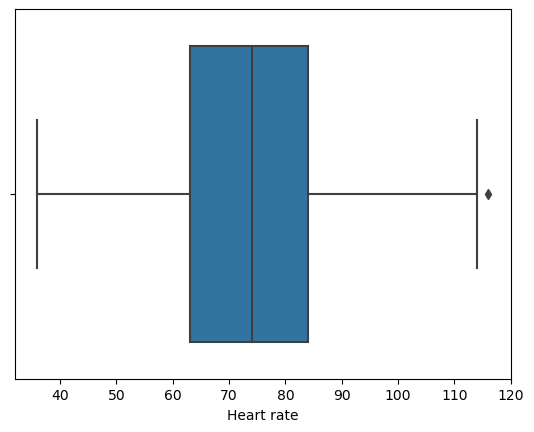

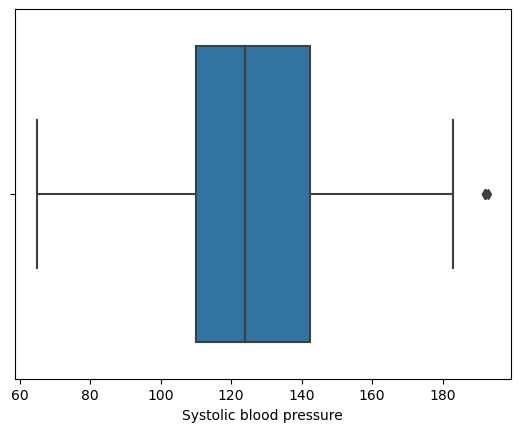

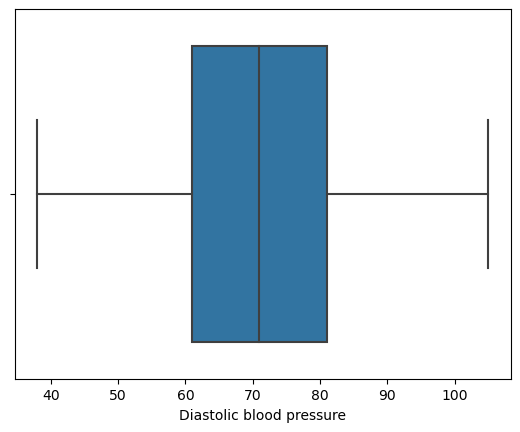

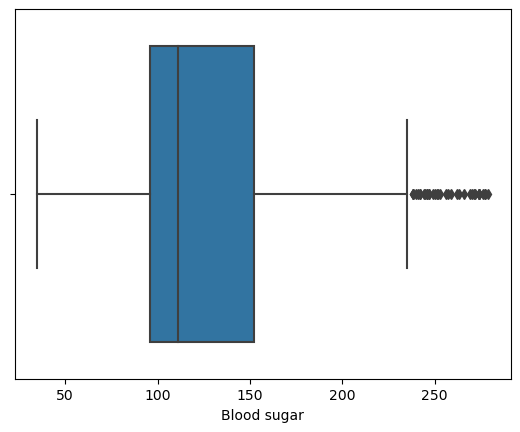

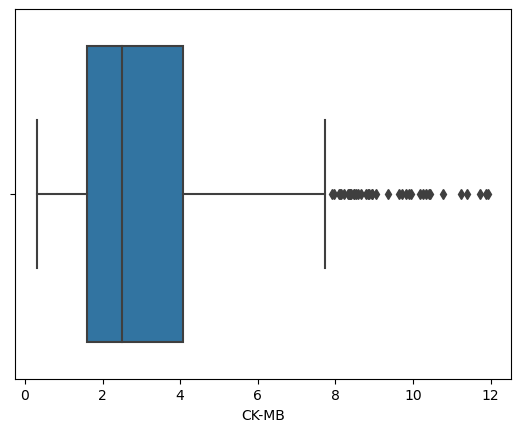

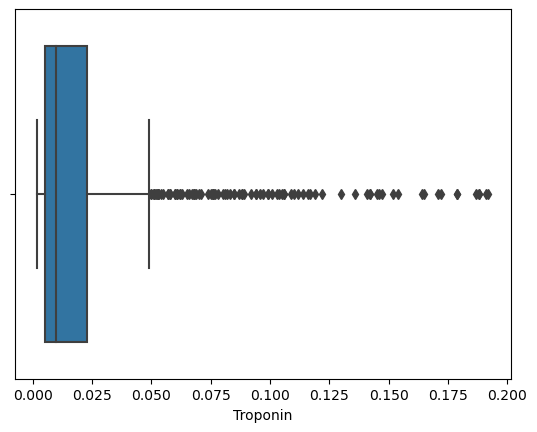

In [145]:
# visualisation de l'après nettoyage
for col in data_clean.select_dtypes(['int','float']):
    plt.figure
    sns.boxplot(data_clean[col])
    plt.show()

In [146]:
data_clean.shape

(788, 9)

In [147]:
data_clean.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
2,55,1,64,160,77,270.0,1.99,0.003,negative
5,58,0,61,112,58,87.0,1.83,0.004,negative
6,32,0,40,179,68,102.0,0.71,0.003,negative
8,44,0,60,154,81,135.0,2.35,0.004,negative


In [148]:
# encodage des variables 
# variable target
label = preprocessing.LabelEncoder()
data_clean['Result'] = label.fit_transform(data_clean['Result'])

# variable binaire
binary = preprocessing.LabelBinarizer()
data_clean['Gender'] = binary.fit_transform(data_clean['Gender'])

# variables numeriques a faire apres le split ou pas

In [149]:
data_clean.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
2,55,1,64,160,77,270.0,1.99,0.003,0
5,58,0,61,112,58,87.0,1.83,0.004,0
6,32,0,40,179,68,102.0,0.71,0.003,0
8,44,0,60,154,81,135.0,2.35,0.004,0


# Application des modèles

In [219]:
mdl_sup = [DecisionTreeClassifier(), RandomForestClassifier(),AdaBoostClassifier(), svm.SVC(),LinearSVC(),KNeighborsClassifier(),GaussianNB()]
#  "svm.SVC", "KNeighborsClassifier", "CategoricalNB","Adaboost"
# mdl_unsup = ["",""]

In [229]:
def deco(x):
    print(str(x)*100)
def split(data,size,class_label):
    train_set, test_set = train_test_split(data, train_size=size, random_state=0, stratify=class_label)
    return train_set, test_set


def split_2(train_set, test_set):
    y_test = test_set["Result"]
    y_train = train_set["Result"]
    # encoder = preprocessing.LabelEncoder()
    # Y_encd = encoder.fit_transform(Y)
    x_train = train_set.iloc[:, 0:8]
    x_test = test_set.iloc[:, 0:8]
    return x_train, x_test, y_train, y_test

def implemantation_supervise(model, x_train, y_train, x_test, n_neighbors=3):
    #if model == KNeighborsClassifier:
        #MD = model(n_neighbors)
    #else:
    MD = model
    mdl = MD.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)

    if model == DecisionTreeClassifier:
        plot_tree(MD,
                  feature_names=['Age', 'Gender', 'Heart rate', 'Systolic blood pressure','Diastolic blood pressure','Blood sugar','CK-MB','Troponin'],
                  class_names=["Positive", "Negative"], filled=True)
        plt.show()
    print("IMPLEMENTATION DE", MD)
    return y_pred


def scoring(y_pred, y_test):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    print("l'accuracy :\n", accuracy)
    deco("_")
    print("la matrice de confusion", confusion_matrix(y_test,y_pred))
    deco("_")
    print(classification_report(y_test, y_pred))
    deco("_")
    return(accuracy, f1, recall)
    
def implementation_unsupervised(model, x_train, n_clusters=3):
    MD = model(n_clusters)
    mdl = MD.fit(x_train)
    y_pred = mdl.predict(x_test)
    if model == KMeans:
        kmeans_clusters = MD.cluster_centers_
    print("IMPLEMENTATION DE", MD)
    return y_pred, kmeans_clusters


la distribution des classes dans le train set :
 0    0.57
1    0.43
Name: Result, dtype: float64
____________________________________________________________________________________________________
la distribution des classes dans le test set :
 0    0.56
1    0.44
Name: Result, dtype: float64


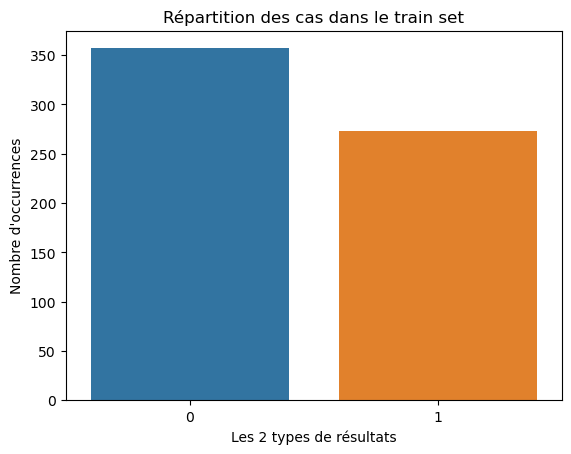

____________________________________________________________________________________________________


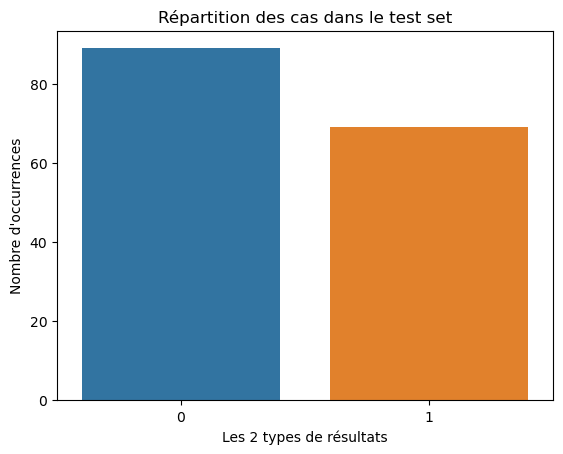

In [172]:
train_set, test_set = split(data_clean, 0.8, data_clean['Result'])

print("la distribution des classes dans le train set :\n", round(train_set['Result'].value_counts(normalize=True),2))
deco("_")
print("la distribution des classes dans le test set :\n", round(test_set['Result'].value_counts(normalize=True),2))
visualisation(train_set, train_set["Result"], "Répartition des cas dans le train set")
deco("_")
visualisation(test_set, test_set["Result"], "Répartition des cas dans le test set")

In [186]:
x_train, x_test, y_train, y_test = split_2(train_set, test_set)

In [231]:
acc_sup = []
f1_sup = []
recall_sup = []

for m in mdl_sup:
    y_pred = implemantation_supervise(m, x_train, y_train, x_test)
    acc, f1,recall = scoring(y_pred, y_test)
    acc_sup.append(acc)
    f1_sup.append(f1)
    recall_sup.append(recall)
    

IMPLEMENTATION DE DecisionTreeClassifier()
l'accuracy :
 0.9810126582278481
____________________________________________________________________________________________________
la matrice de confusion [[86  3]
 [ 0 69]]
____________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        89
           1       0.96      1.00      0.98        69

    accuracy                           0.98       158
   macro avg       0.98      0.98      0.98       158
weighted avg       0.98      0.98      0.98       158

____________________________________________________________________________________________________
IMPLEMENTATION DE RandomForestClassifier()
l'accuracy :
 0.9873417721518988
____________________________________________________________________________________________________
la matrice de confusion [[88  1]
 [ 1 68]]
_______________________________

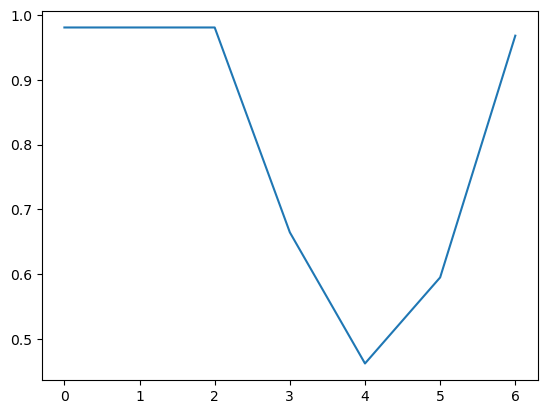

In [223]:
plt.plot(score_sup)

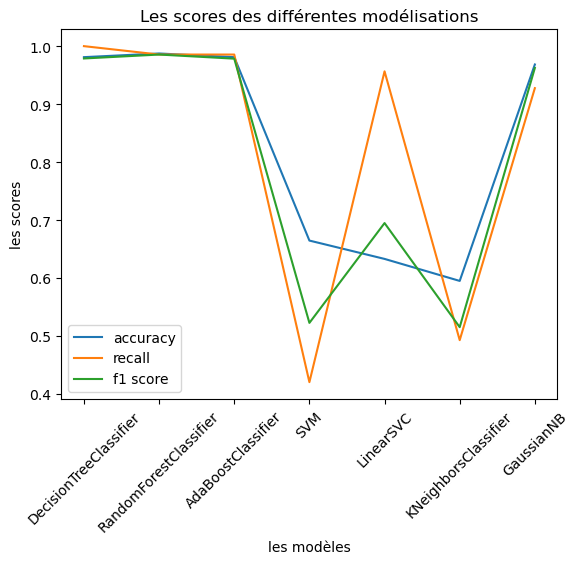

In [233]:
#Afficher la liste des scores dans une courbe
#print(score_list)
mdl_ls = ["DecisionTreeClassifier", "RandomForestClassifier","AdaBoostClassifier", "SVM","LinearSVC","KNeighborsClassifier","GaussianNB"]

fig, ax = plt.subplots()
ax.set(title="Les scores des différentes modélisations",
           ylabel="les scores",
          xlabel="les modèles")
ax.set_xticklabels(mdl_ls, rotation =45)
ax.plot(mdl_ls,acc_sup, label="accuracy")
ax.plot(mdl_ls,recall_sup, label="recall")
ax.plot(mdl_ls,f1_sup, label="f1 score")
plt.legend()